In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df_elvation=pd.read_csv("coordinates_swe2hs_paper_stations.csv")
df_r2=pd.read_csv("r2_df.csv")

In [63]:
df_elv = df_elvation[['site_id','elevation_[m]']].rename(columns={'site_id': 'site','elevation_[m]':'elv'})
print(df_r2.head(10),df_elv.head(10))

  site_id        R2
0     1AD  0.948249
1     1GD  0.974803
2     1GS  0.963426
3     1GT  0.970897
4     1LS  0.947441
5     1MI  0.968905
6     1MR  0.975466
7     2AN  0.976402
8     2RI  0.935911
9     2ST  0.972342   site   elv
0  1AD  1325
1  1GA  1190
2  1GB  1565
3  1GD  1950
4  1GS  1195
5  1GT  1510
6  1JA  1520
7  1LS  1300
8  1MI  1320
9  1MR  1650


In [64]:
df_r2_u  = df_r2.drop_duplicates(subset="site_id")
df_elv_u = df_elv.drop_duplicates(subset="site")

df_merged = df_r2_u.merge(
    df_elv_u,
    left_on="site_id",
    right_on="site",
    how="inner"
)
df_merged
# df_merged["site_id"].value_counts().head()


,site_id,R2,site,elv
0,1AD,0.948249,1AD,1325
1,1GD,0.974803,1GD,1950
2,1GS,0.963426,1GS,1195
3,1GT,0.970897,1GT,1510
4,1LS,0.947441,1LS,1300
5,1MI,0.968905,1MI,1320
6,1MR,0.975466,1MR,1650
7,2AN,0.976402,2AN,1440
8,2RI,0.935911,2RI,1640
9,2ST,0.972342,2ST,1280


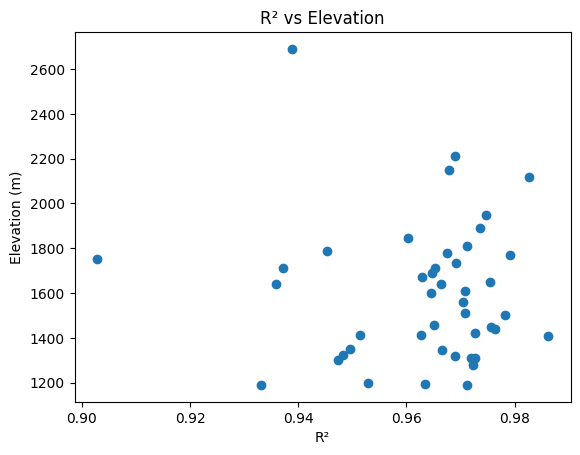

In [65]:
plt.figure()
plt.scatter(df_merged["R2"],df_merged["elv"])
plt.xlabel("R²")
plt.ylabel("Elevation (m)")
plt.title("R² vs Elevation")
plt.savefig("R²vsElevation.png", dpi=300, bbox_inches='tight') 
plt.show()


In [66]:
df=pd.read_csv("manual_stations_validation_data.csv")
df['date'] = pd.to_datetime(df['date'])
print(df['date'])

def categorize_month(date):
    month = date.month
    if month in [2, 3, 4, 5, 6, 7]:
        return 2
    else:
        return 1
def categorize_month(date):
    month = date.month
    if month in [2, 3, 4, 5, 6, 7]:
        return 2
    else:
        return 1

# Create the new column
df['month_category'] = df['date'].apply(categorize_month)

# Save the updated data to a new CSV file
df.to_csv('updated_manual_stations_data.csv', index=False)

# Display the first few rows to verify
# print(df[['date', 'month_category']].head())

0        1991-10-18
1        1991-10-19
2        1991-10-20
3        1991-10-21
4        1991-10-22
            ...    
223545   2020-04-02
223546   2020-04-03
223547   2020-04-30
223548   2020-05-01
223549   2020-05-02
Name: date, Length: 223550, dtype: datetime64[ns]


In [67]:
import datetime
def hi(date):
    x=date.month
    if x in [1]:
        return 2
    else:
        return 0
my_date = datetime.datetime.strptime("10-10-10", "%y-%m-%d")
print(my_date)

2010-10-10 00:00:00


In [68]:

df_months  = pd.read_csv("R2_Snow_noSnow_elavation.csv") 
print(df_months.columns.tolist())

['site_id', 'R2_Snow', 'R2_No_Snow', 'elv', 'delta_R2']


In [69]:
df_months

,site_id,R2_Snow,R2_No_Snow,elv,delta_R2
0,1AD,0.926136,0.956271,1325,0.030136
1,1GD,0.973809,0.962445,1950,-0.011364
2,1GS,0.952419,0.960398,1195,0.007980
3,1GT,0.961341,0.962768,1510,0.001427
4,1LS,0.914702,0.959346,1300,0.044644
5,1MI,0.964045,0.967007,1320,0.002962
6,1MR,0.966380,0.971791,1650,0.005411
7,2AN,0.978590,0.968545,1440,-0.010045
8,2RI,0.894098,0.933994,1640,0.039896
9,2ST,0.963973,0.970794,1280,0.006821


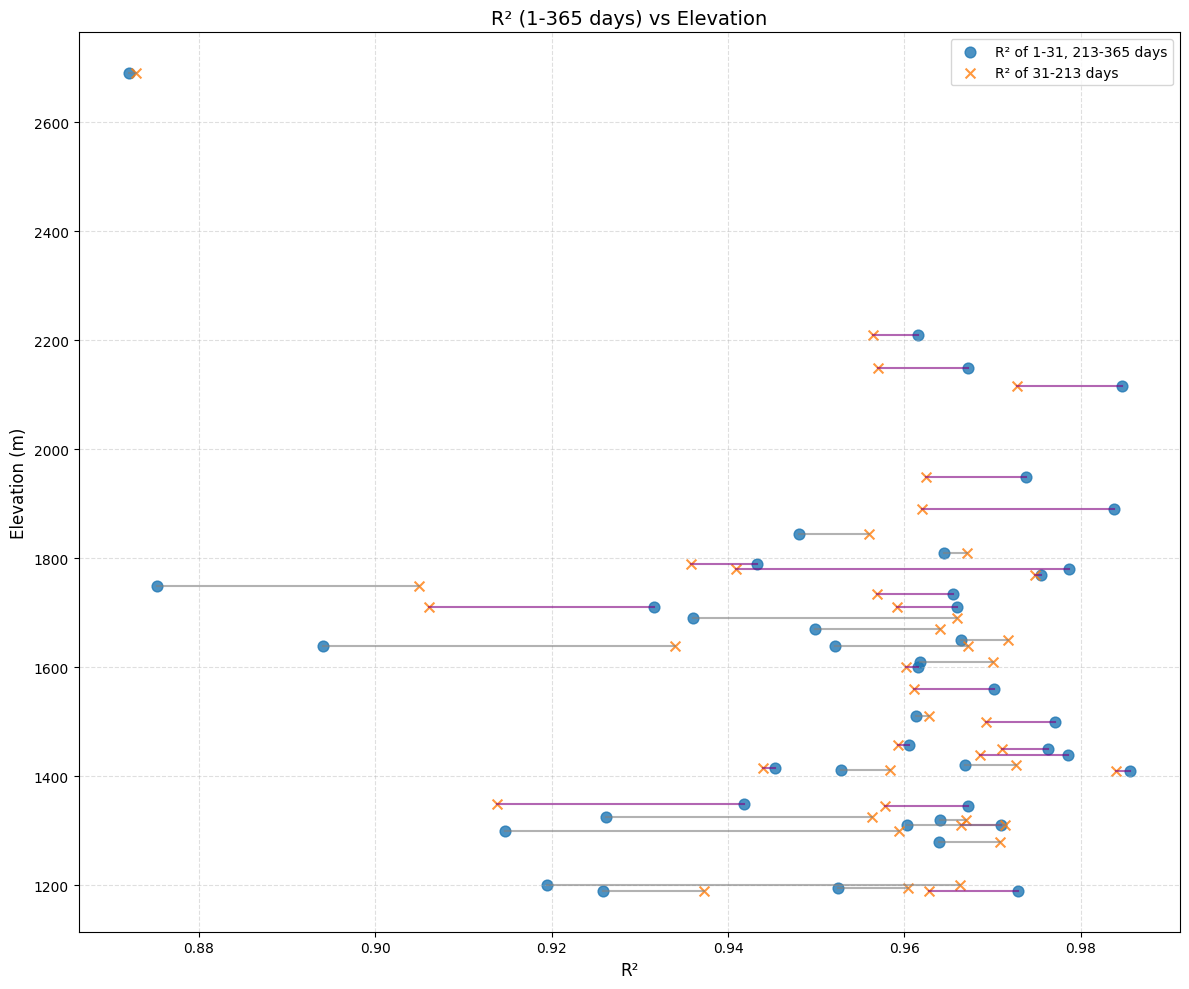

In [70]:
import matplotlib.pyplot as plt

# -----------------------------
# Assuming df_months has columns:
# site_id | R2_Snow | R2_No_Snow | elv | delta_R2
# -----------------------------

plt.figure(figsize=(12, 10))
ax = plt.gca()  # current axis

# --- R2_Snow (circle)
plt.scatter(
    df_months["R2_Snow"],
    df_months["elv"],
    marker="o",
    s=60,
    alpha=0.8,
    label="R² of 1-31, 213-365 days"
)

# --- R2_No_Snow (cross)
plt.scatter(
    df_months["R2_No_Snow"],
    df_months["elv"],
    marker="x",
    s=50,
    alpha=0.8,
    label="R² of 31-213 days"
)

# -----------------------------
# Connect Snow ↔ No-Snow with color based on delta_R2
# -----------------------------
for _, row in df_months.iterrows():
    color = "gray" if row["delta_R2"] > 0 else "purple"
    plt.plot(
        [row["R2_Snow"], row["R2_No_Snow"]],
        [row["elv"], row["elv"]],
        linestyle="-",
        color=color,
        alpha=0.6,
        linewidth=1.5
    )

# -----------------------------
# Labels, title, grid, legend
# -----------------------------
plt.xlabel("R²", fontsize=12)
plt.ylabel("Elevation (m)", fontsize=12)
plt.title("R² (1-365 days) vs Elevation", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()

# -----------------------------
# Add station labels (optional)
# -----------------------------
#for _, row in df_months.iterrows():
#    plt.text(row["R2_Snow"], row["elv"] + 10, row["site_id"], fontsize=7)

plt.tight_layout()
plt.savefig("R2_days_vs_Elevation.png", dpi=500, bbox_inches='tight')
plt.show()



here i am trying to get values for latitude and longitude

In [71]:
df_months.head(2)
df_elvation.head(2)
df_lat_lon= df_elvation[['site_id','lon_[wgs84]','lat_[wgs84]']].rename(columns={'site_id': 'site','lon_[wgs84]':'lon',
                                                                          'lat_[wgs84]':'lat'})
# print(df_months)

df_lat_lon 

,site,lon,lat
0,1AD,7.560705,46.492044
1,1GA,8.352310,46.736667
2,1GB,8.051395,46.647282
3,1GD,8.064320,46.657918
4,1GS,7.278514,46.376429
...,...,...,...
109,WAL_aws,11.638580,47.168200
110,FEL_aws,10.220330,47.339910
111,KUR_aws,12.959730,47.570140
112,SPI_aws,11.886170,47.671550


In [72]:
def merge_lat_lon_r2(df_lat_lon, df_months_r2):
    # Ensure correct column names for merging
    df_lat_lon = df_lat_lon.rename(columns={"site": "site_id"})
    
    # Drop duplicates
    df_lat_lon = df_lat_lon.drop_duplicates(subset="site_id")
    df_months_r2 = df_months_r2.drop_duplicates(subset="site_id")
    
    # Merge DataFrames
    df_merged_lat_lon = df_lat_lon.merge(
        df_months_r2,
        on="site_id",
        how="inner"
    )
    
    return df_merged_lat_lon

# Usage
df_merged_lat_lon = merge_lat_lon_r2(df_lat_lon, df_months_r2)
df_merged_lat_lon.head()
# Optionally, check site counts
# df_merged["site_id"].value_counts().head()

df_merged_lat_lon.to_csv("Latitude_Long_R2_value.csv",index=False)

In [73]:
df_heatmap=pd.read_csv("Latitude_Long_R2_value.csv")

In [74]:
import plotly.express as px

# Ensure numeric columns are properly read
df_heatmap["lon"] = pd.to_numeric(df_heatmap["lon"], errors="coerce")
df_heatmap["lat"] = pd.to_numeric(df_heatmap["lat"], errors="coerce")
df_heatmap["R2_Snow"] = pd.to_numeric(df_heatmap["R2_Snow"], errors="coerce")
df_heatmap["R2_No_Snow"] = pd.to_numeric(df_heatmap["R2_No_Snow"], errors="coerce")


In [75]:
px.scatter_mapbox

<function plotly.express._chart_types.scatter_mapbox(data_frame=None, lat=None, lon=None, color=None, text=None, hover_name=None, hover_data=None, custom_data=None, size=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, opacity=None, size_max=None, zoom=8, center=None, mapbox_style=None, title=None, subtitle=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure>

In [76]:
# Heatmap for R2_Snow
fig_snow = px.scatter_mapbox(
    df_heatmap,
    lat="lat",
    lon="lon",
    color="R2_Snow",
    size="R2_Snow",
    hover_name="site_id",
    hover_data={"lon": True, "lat": True, "R2_Snow": True},
    color_continuous_scale="Viridis",
    size_max=15,
    zoom=6,
    mapbox_style="carto-positron"
)

fig_snow.update_layout(title="Heatmap of R2_Snow")
fig_snow.show()
# Heatmap for R2_No_Snow
fig_no_snow = px.scatter_mapbox(
    df_heatmap,
    lat="lat",
    lon="lon",
    color="R2_No_Snow",
    size="R2_No_Snow",
    hover_name="site_id",
    hover_data={"lon": True, "lat": True, "R2_No_Snow": True},
    color_continuous_scale="Plasma",
    size_max=15,
    zoom=6,
    mapbox_style="carto-positron"
)
fig_no_snow.update_layout(title="Heatmap of R2_No_Snow")
fig_no_snow.show()

C:\Users\AS\AppData\Local\Temp\ipykernel_16948\4016653082.py:2: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# !pip install nbformat --upgrade?
# !pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension



SyntaxError: invalid syntax (3894964390.py, line 3)

In [77]:
import sys
!{sys.executable} -m jupyter --version

Selected Jupyter core packages...
IPython          : 9.9.0
ipykernel        : 7.1.0
ipywidgets       : 8.1.8
jupyter_client   : 8.8.0
jupyter_core     : 5.9.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : not installed
nbconvert        : not installed
nbformat         : 5.10.4
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.14.3
